In [1]:
import pandas as pd
from scipy.stats import entropy
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier,  export_graphviz
from sklearn import tree
import datetime
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score

import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn import tree


In [2]:
def data_import(df):
    import_df = pd.read_csv(f'../Data/wildfires_{df}.txt', sep='\t')
    
    for column in import_df:
        try:
            import_df[column] = import_df[column].str.strip()
        except:
            pass
        return import_df

df = pd.DataFrame(data_import('training'))
#df.reset_index(inplace=True, drop=False)

## Calculate information gain thresholds for continuous fields 
- Temp
- Humidity
- Rainfall
- Drought Code
- Buildup Index
- wind Speed

In [3]:
# Calculate entropy for the dataset
mask = df['fire']=='yes'
S = entropy([len(df[mask]), len(df[~mask])] ,base=2)
S

0.9995132881417702

In [4]:
#Cleaning Data

#Rainfall has a max sigma of 7.1 - this is a less than 1/million. Will remove this from the dataset
index_val = df[df['rainfall']>= (df['rainfall'].mean()+(df['rainfall'].std()*6))].index
df.drop(index_val, inplace=True)


# Quantising the data

In [5]:
df['Date'] = pd.to_datetime(df[["year", "month", "day"]])
df['weekday'] = df.Date.dt.weekday
df.loc[(df['weekday']<=4), 'weekend'] = 0
df.loc[(df['weekday'] >=5), 'weekend'] = 1


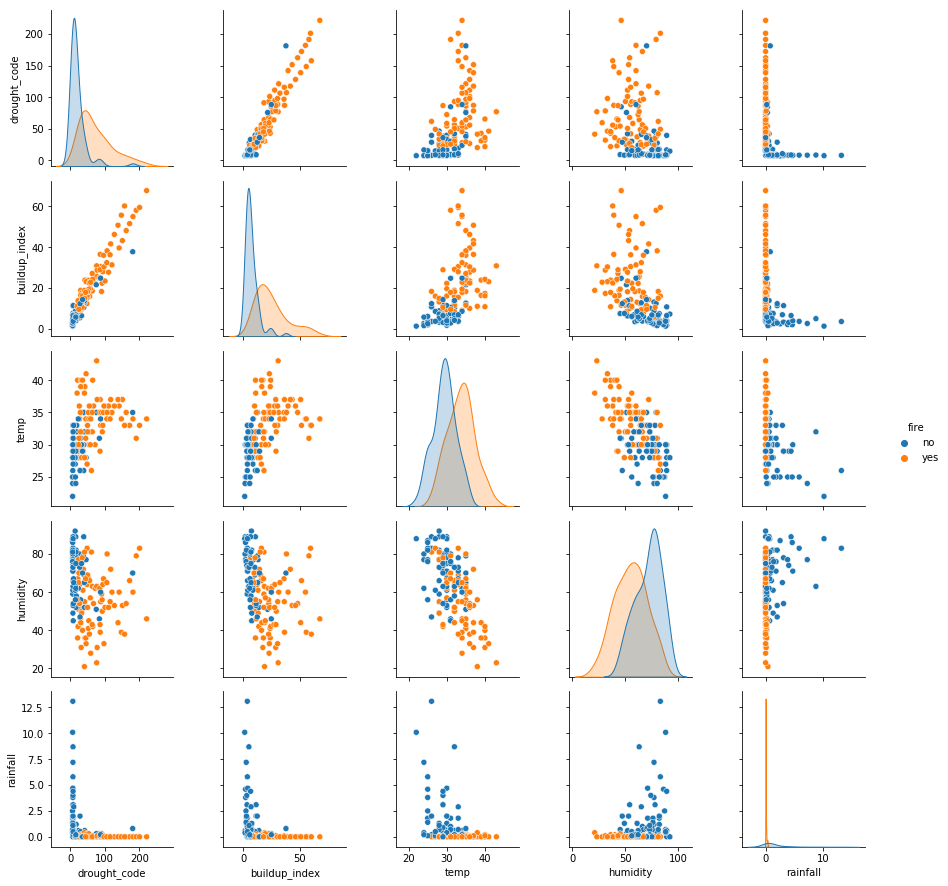

In [46]:
#plot = sns.pairplot(df, vars=['temp', 'humidity', 'rainfall', 'drought_code','buildup_index', 'wind_speed', 'weekend'], hue='fire')
plot = sns.pairplot(df, vars=['drought_code', 'buildup_index', 'temp', 'humidity', 'rainfall'], hue='fire')



plot.savefig("../Output/Pairplot.png")


In [24]:
target = 'fire'
#features = ['temp', 'humidity', 'rainfall', 'drought_code', 'buildup_index',  'wind_speed']
features = ['drought_code', 'buildup_index', 'temp', 'humidity', 'rainfall']

X = df[features]
y = df[target]

In [84]:
clf = DecisionTreeClassifier(max_depth = 6, random_state = 0, min_samples_split=20, criterion='entropy')# Step 3: Train the model on the data
clf.fit(X, y)

DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_split=20,
                       random_state=0)

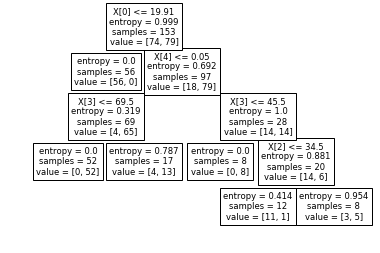

In [85]:
tree.plot_tree(clf);

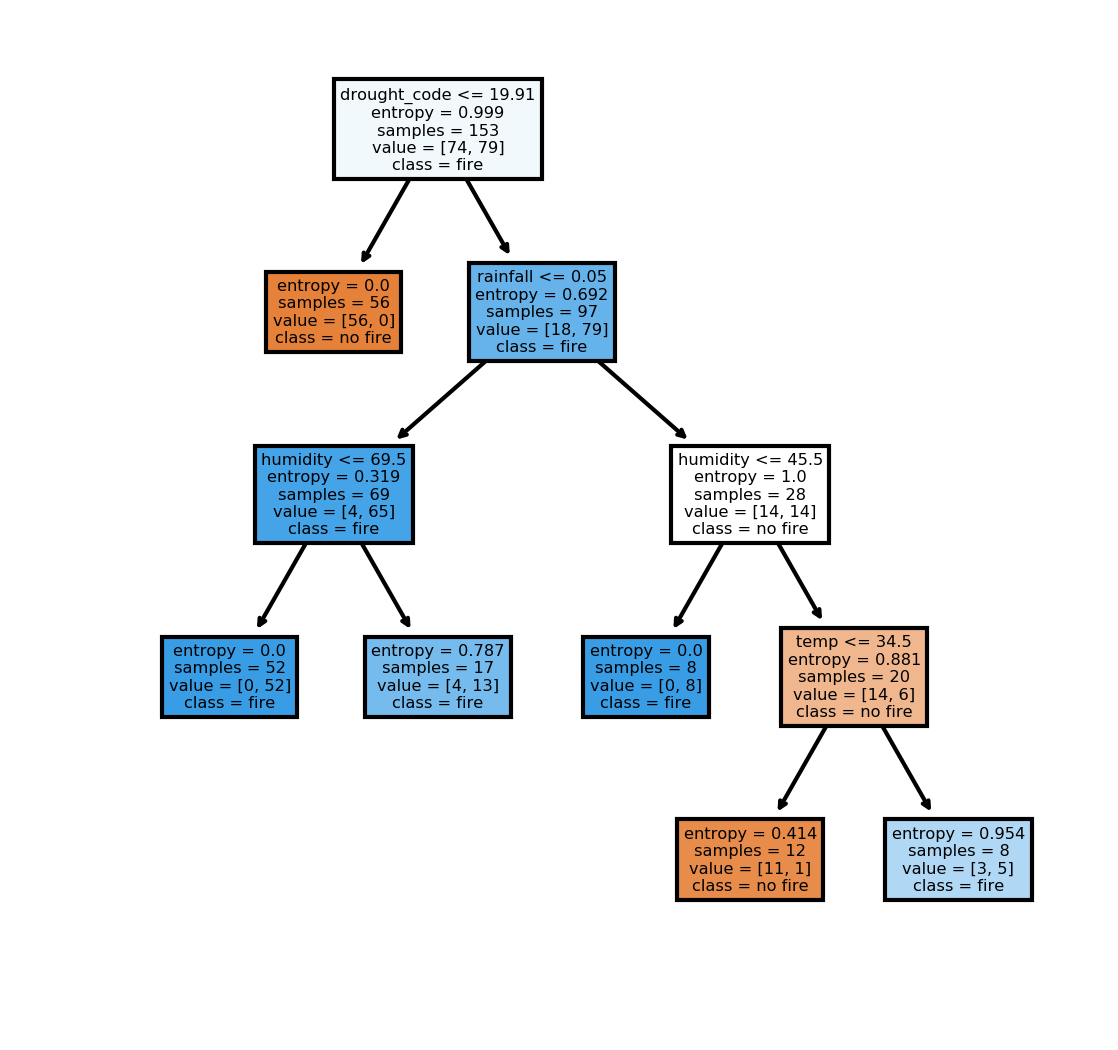

In [86]:
#fn=['temp', 'humidity', 'rainfall', 'drought_code', 'buildup_index', 'wind_speed']
fn=['drought_code', 'buildup_index', 'temp', 'humidity', 'rainfall']

cn=['no fire', 'fire']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(clf,feature_names = fn, class_names=cn, filled = True);



In [87]:
tree.export_graphviz(clf,
                     out_file="tree_entropy.dot",
                     feature_names = fn, 
                     class_names=cn,
                     filled = True)

In [88]:
test_df = data_import('test')
y_test = test_df["fire"]

In [89]:
y_pred = clf.predict(test_df[features])

In [90]:
pd.DataFrame(y_pred).to_excel("predicted outcome.xlsx")

## Evaluation of the model

In [91]:
# How well does the model predict it's own data
cross_val_score(clf, X, y, cv=3, scoring='accuracy')

array([0.84313725, 0.88235294, 0.84313725])

In [92]:
# Create predictions from the training data to build the confusion matrix
y_train_pred = cross_val_predict(clf, X, y, cv=3)

In [93]:
"""
TN|FP
FN|TP

"""

confusion_matrix(y, y_train_pred)



array([[64, 10],
       [12, 67]], dtype=int64)

In [94]:
# Confusion matric with predictions vs actual
confusion_matrix(y_test, y_pred)

array([[20,  2],
       [ 5, 23]], dtype=int64)

In [95]:
y_test = y_test.map({'yes': 1, 'no': 0}).astype(int)
y_pred  = pd.Series(y_pred).map({'yes': 1, 'no': 0}).astype(int)

In [96]:
precision_score(y_test, y_pred)


0.92

In [97]:
recall_score(y_test, y_pred)

0.8214285714285714

In [98]:
f1_score(y_test, y_pred)

0.8679245283018867

In [99]:
43/50

0.86